# HW2 Part 2 - MGT 6203

## 2.1 Q1.

In [1]:
library(dplyr)
library(datasets)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data(mtcars)

In [3]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [4]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [5]:
mtcars$cyl<-factor(mtcars$cyl)

In [6]:
class(mtcars$cyl)

[1] "factor"

## Q2.1.1 A

We will consider cars with 4 cylinders as the “control” group, and cars with 6 and 8 cylinders as “treatment” groups.

### Difference Estimator 1 - Difference in Means

In [7]:
# Subset with 4 and 6 cylinders
mtcars_4_6 <- subset(mtcars, cyl %in% c(4, 6))

# Subset with 8 cylinders
mtcars_4_8 <- subset(mtcars, cyl %in% c(4, 8))

In [8]:
# Compute the difference estimator for mpg
mean_4cyl <- mean(mtcars_4_6$mpg[mtcars_4_6$cyl == 4])
mean_6cyl <- mean(mtcars_4_6$mpg[mtcars_4_6$cyl == 6])
mean_8cyl <- mean(mtcars_4_8$mpg[mtcars_4_8$cyl == 8])

diff_estimator_4_6 <- mean_4cyl - mean_6cyl

diff_estimator_4_8 <- mean_4cyl - mean_8cyl

In [9]:
diff_estimator_4_6

[1] 6.920779

In [10]:
diff_estimator_4_8

[1] 11.56364

Difference between cars with 4 cylinders and 6 cylinders is 6.92077 mpg

Difference between cars with 4 cylinders and 8 cylinders is 11.5636 mpg


### Difference Estimator 2 - Linear Regression

In [11]:
model_4_6 <- lm(mpg ~ cyl, data = mtcars_4_6)
model_4_8 <- lm(mpg ~ cyl, data = mtcars_4_8)

In [12]:
summary(model_4_6)


Call:
lm(formula = mpg ~ cyl, data = mtcars_4_6)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -2.1834 -0.2929  1.5571  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.664      1.108  24.065 5.43e-14 ***
cyl6          -6.921      1.777  -3.895  0.00129 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.675 on 16 degrees of freedom
Multiple R-squared:  0.4867,	Adjusted R-squared:  0.4547 
F-statistic: 15.17 on 1 and 16 DF,  p-value: 0.001287


In [13]:
coef_estimates_4_6 <- coef(model_4_6)

In [14]:
coef_estimates_4_6

(Intercept)        cyl6 
  26.663636   -6.920779

In [15]:
diff_estimator_4_6 <- coef_estimates_4_6[2] - coef_estimates_4_6[1]
diff_estimator_4_6

cyl6 
-33.58442

In [16]:
summary(model_4_8)


Call:
lm(formula = mpg ~ cyl, data = mtcars_4_8)

Residuals:
   Min     1Q Median     3Q    Max 
-5.264 -2.264  0.100  2.200  7.236 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.664      1.068  24.966  < 2e-16 ***
cyl8         -11.564      1.427  -8.102 3.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.542 on 23 degrees of freedom
Multiple R-squared:  0.7405,	Adjusted R-squared:  0.7293 
F-statistic: 65.65 on 1 and 23 DF,  p-value: 3.446e-08


In [17]:
coef_estimates_4_8 <- coef(model_4_8)

In [18]:
coef_estimates_4_8

(Intercept)        cyl8 
   26.66364   -11.56364

In [19]:
diff_estimator_4_8 <- coef_estimates_4_8[2] - coef_estimates_4_8[1]
diff_estimator_4_8

cyl8 
-38.22727

In [20]:
diff_estimator_4_6
diff_estimator_4_8

cyl6 
-33.58442

cyl8 
-38.22727

---

## 2.1.2 B

In [21]:
mean_4cyl <- mean(mtcars$mpg[mtcars$cyl == 4])
mean_6cyl <- mean(mtcars$mpg[mtcars$cyl == 6])
mean_8cyl <- mean(mtcars$mpg[mtcars$cyl == 8])

In [22]:
mean_4cyl

[1] 26.66364

In [23]:
mean_6cyl

[1] 19.74286

In [24]:
mean_8cyl

[1] 15.1

Cars with 8 cylinders has the lowest miles per gallon at 15.1

---

## Q2

In [25]:
wage <- read.csv('min_wage.csv')

In [26]:
head(wage)

,d,d_nj,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp,State
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,1,1,13.1,0,1,1,1,1,0,1,1,1,12.50,New Jersey
2,1,1,19.3,0,1,1,1,1,0,1,1,1,7.00,New Jersey
3,1,1,18.8,1,1,0,1,1,0,1,1,1,-0.50,New Jersey
4,1,1,22.3,1,1,0,1,0,1,1,1,1,2.75,New Jersey
5,1,1,31.1,0,1,1,1,1,1,1,1,1,13.50,New Jersey
6,1,1,8.1,1,0,1,1,1,1,1,1,1,1.50,New Jersey


In [27]:
unique(wage$State)

[1] "New Jersey"   "Philadelphia"

In [28]:
unique(wage$d)

[1] 1 0

In [29]:
summary(wage)

       d            d_nj            fte               bk             kfc       
 Min.   :0.0   Min.   :0.000   Min.   :  0.40   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.0   1st Qu.:0.000   1st Qu.: 15.80   1st Qu.:0.000   1st Qu.:1.000  
 Median :0.5   Median :1.000   Median : 23.25   Median :1.000   Median :1.000  
 Mean   :0.5   Mean   :0.609   Mean   : 25.69   Mean   :0.587   Mean   :0.799  
 3rd Qu.:1.0   3rd Qu.:1.000   3rd Qu.: 32.40   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :1.0   Max.   :1.000   Max.   :114.70   Max.   :1.000   Max.   :1.000  
      roys           wendys         co_owned        centralj        southj     
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.000   1st Qu.:1.00   1st Qu.:1.000  
 Median :1.000   Median :1.000   Median :1.000   Median :1.00   Median :1.000  
 Mean   :0.752   Mean   :0.862   Mean   :0.638   Mean   :0.88   Mean   :0.784  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.

## 2.2.1 A

New Jersey is Treatment

Philadelphia is Control

1 is after

0 is before

Group A - Philadelphia Before

Group B - New Jersey Before

Group C - Philadelphia After

Groups D - New Jersey After

In [30]:
wage$Classification <- ifelse(wage$State == "Philadelphia" & wage$d == "0", "A",
                              ifelse(wage$State == "Philadelphia" & wage$d == "1", "C",
                                ifelse(wage$State == "New Jersey" & wage$d == "0", "B",
                                  ifelse(wage$State == "New Jersey" & wage$d == "1", "D", ""))))

In [31]:
unique(wage$Classification)

[1] "D" "B" "A" "C"

In [32]:
class(wage$Classification)

[1] "character"

## 2.2.2 B

In [33]:
mean_A <- mean(wage$fte[wage$Classification == 'A'])

mean_B <- mean(wage$fte[wage$Classification == 'B'])

mean_C <- mean(wage$fte[wage$Classification == 'C'])

mean_D <- mean(wage$fte[wage$Classification == 'D'])



In [34]:
mean_A
mean_B
mean_C
mean_D

[1] 25.2788

[1] 26.2928

[1] 26.2456

[1] 24.9456

## 2.2.4 C

In [35]:
treatment_group_before = mean_B

treatment_group_after = mean_D

control_group_before = mean_A

control_group_after = mean_C

In [36]:
diff_in_diff <- (treatment_group_after - treatment_group_before) - (control_group_after - control_group_before)

In [37]:
diff_in_diff

[1] -2.314

Difference in Difference estimator is -2.314.

## 2.2.5 D

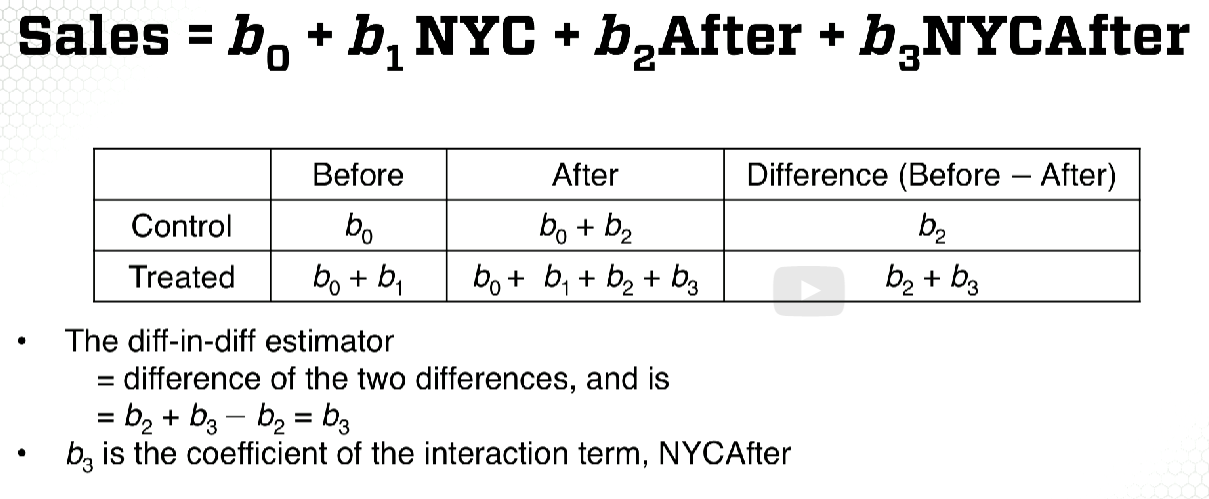

I need to model
fte ~ d + State + d*State

In [40]:
wage$State <- ifelse(wage$State == "New Jersey", 1, 0)

In [41]:
head(wage)

,d,d_nj,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp,State,Classification
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,1,13.1,0,1,1,1,1,0,1,1,1,12.50,1,D
2,1,1,19.3,0,1,1,1,1,0,1,1,1,7.00,1,D
3,1,1,18.8,1,1,0,1,1,0,1,1,1,-0.50,1,D
4,1,1,22.3,1,1,0,1,0,1,1,1,1,2.75,1,D
5,1,1,31.1,0,1,1,1,1,1,1,1,1,13.50,1,D
6,1,1,8.1,1,0,1,1,1,1,1,1,1,1.50,1,D


In [42]:
wage$interaction <- wage$State*wage$d

In [44]:
model <- lm(fte ~ d + State + interaction, data=wage)
summary(model)


Call:
lm(formula = fte ~ d + State + interaction, data = wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.746  -9.806  -2.546   6.879  89.754 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.2788     0.8864  28.517   <2e-16 ***
d             0.9668     1.2536   0.771    0.441    
State         1.0140     1.2536   0.809    0.419    
interaction  -2.3140     1.7729  -1.305    0.192    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.02 on 996 degrees of freedom
Multiple R-squared:  0.00178,	Adjusted R-squared:  -0.001227 
F-statistic: 0.5919 on 3 and 996 DF,  p-value: 0.6204


The coefficient of the interaction term is -2.314 which is exactly the same as the answer in part C.

---

## Question 3

In [ ]:
install.packages("PerformanceAnalytics")#, lib="../work/")
install.packages("xts")#, lib="../work/")
install.packages("lubridate")#, lib="../work/")
install.packages("tidyverse")#, lib="../work/")
install.packages("data.table")#, lib="../work/")


In [ ]:
library(PerformanceAnalytics)#, lib.loc="../work/")
library(xts)#, lib.loc="../work/")
library(lubridate)#, lib.loc="../work/")
library(tidyverse)#, lib.loc="../work/")
library(data.table)#, lib.loc="../work/")

In [ ]:
ticker_aapl <- read.csv("aapl.csv", header = TRUE)
ticker_googl <- read.csv("googl.csv", header = TRUE)
ticker_amzn <- read.csv("amzn.csv", header = TRUE)
ticker_meta <- read.csv("meta.csv", header = TRUE)
ticker_nflx <- read.csv("nflx.csv", header = TRUE)
ticker_gspc <- read.csv("market.csv", header = TRUE)

##Qn 2.3.1 A

For my reference I addded the screenshot below.

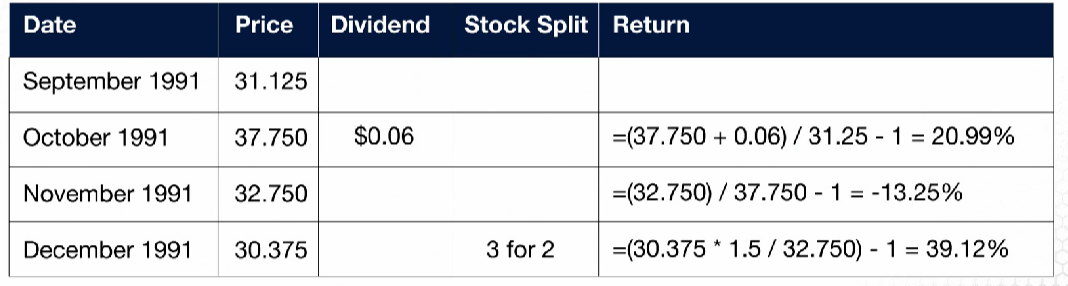

In [ ]:
head(ticker_aapl)

,Date,Close,Dividends,Stock.Splits
,<chr>,<dbl>,<dbl>,<int>
1,2019-12-31,71.92057,0.0000,0
2,2020-01-31,75.80502,0.0000,0
3,2020-02-28,67.11005,0.1925,0
4,2020-03-31,62.42836,0.0000,0
5,2020-04-30,72.12809,0.0000,0
6,2020-05-29,78.26578,0.2050,0


In [ ]:
unique(ticker_aapl$Dividends)

[1] 0.0000 0.1925 0.2050 0.2200 0.2300

In [ ]:
unique(ticker_aapl$Stock.Splits)

[1] 0 4

In [ ]:
split_aapl <- ticker_aapl[ticker_aapl$Stock.Splits == 4, ]
split_aapl

,Date,Close,Dividends,Stock.Splits
,<chr>,<dbl>,<dbl>,<int>
9,2020-08-31,127.2897,0.205,4


In [ ]:
ticker_googl$Dividends <- as.double(ticker_googl$Dividends)

In [ ]:
head(ticker_googl)

,Date,Close,Dividends,Stock.Splits
,<chr>,<dbl>,<dbl>,<int>
1,2019-12-31,66.9695,0,0
2,2020-01-31,71.6390,0,0
3,2020-02-28,66.9625,0,0
4,2020-03-31,58.0975,0,0
5,2020-04-30,67.3350,0,0
6,2020-05-29,71.6760,0,0


In [ ]:
unique(ticker_googl$Stock.Splits)

[1]  0 20

In [ ]:
unique(ticker_googl$Dividends)

[1] 0

Google did not pay dividends.

In [ ]:
split_googl <- ticker_googl[ticker_googl$Stock.Splits == 20, ]
split_googl

,Date,Close,Dividends,Stock.Splits
,<chr>,<dbl>,<dbl>,<int>
32,2022-07-29,116.32,0,20


In [ ]:
# Change all 0 stock split values to 1 for easier computation
ticker_googl$Stock.Splits[ticker_googl$Stock.Splits == 0] <- 1
ticker_aapl$Stock.Splits[ticker_aapl$Stock.Splits == 0] <- 1

In [ ]:
unique(ticker_aapl$Stock.Splits)
unique(ticker_googl$Stock.Splits)

[1] 1 4

[1]  1 20

### Create 'Returns' Column for GOOGL and AAPL

In [ ]:
length(ticker_googl$Close)
length(ticker_aapl$Close)

[1] 37

[1] 37

In [ ]:
ticker_aapl$Close[2]

[1] 75.80502

In [ ]:
ticker_googl$Simple_Return <- 0
ticker_aapl$Simple_Return <- 0

In [ ]:
# Googl
for(i in 2:length(ticker_googl$Close)) {
    ticker_googl$Simple_Return[i] <- (((ticker_googl$Close[i]*ticker_googl$Stock.Splits[i])+ticker_googl$Dividends[i]) / lag(ticker_googl$Close[i-1])-1)*100
}

In [ ]:
# AAPL
for(i in 2:length(ticker_aapl$Close)) {
    ticker_aapl$Simple_Return[i] <- (((ticker_aapl$Close[i]*ticker_aapl$Stock.Splits[i])+ticker_aapl$Dividends[i]) / lag(ticker_aapl$Close[i-1])-1)*100
}

In [ ]:
head(ticker_aapl)

,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,71.92057,0.0000,1,0.000000
2,2020-01-31,75.80502,0.0000,1,5.401021
3,2020-02-28,67.11005,0.1925,1,-11.216226
4,2020-03-31,62.42836,0.0000,1,-6.976144
5,2020-04-30,72.12809,0.0000,1,15.537377
6,2020-05-29,78.26578,0.2050,1,8.793644


In [ ]:
head(ticker_googl)

,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,66.9695,0,1,0.000000
2,2020-01-31,71.6390,0,1,6.972581
3,2020-02-28,66.9625,0,1,-6.527867
4,2020-03-31,58.0975,0,1,-13.238755
5,2020-04-30,67.3350,0,1,15.899994
6,2020-05-29,71.6760,0,1,6.446875


In [ ]:
max_value_aapl <- max(ticker_aapl$Simple_Return)
max_value_googl <- max(ticker_googl$Simple_Return)

In [ ]:
max_value_aapl
max_value_googl

[1] 386.8237

[1] 2035.037

### The months with the highest Simple Returns for GOOGL and AAPL are given below

In [ ]:
ticker_googl[ticker_googl$Simple_Return == max_value_googl, ]
ticker_aapl[ticker_aapl$Simple_Return == max_value_aapl, ]

,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
32,2022-07-29,116.32,0,20,2035.037


,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
9,2020-08-31,127.2897,0.205,4,386.8237


---

## Qn 2.3.2 B

In [ ]:
head(ticker_amzn)
head(ticker_meta)
head(ticker_nflx)


,Date,return_amzn
,<chr>,<dbl>
1,2020-01-31,-0.06221372
2,2020-02-28,0.03502057
3,2020-03-31,0.26890012
4,2020-04-30,-0.01278494
5,2020-05-29,0.12956672
6,2020-06-30,0.14711363


,Date,return_meta
,<chr>,<dbl>
1,2020-01-31,-0.016542005
2,2020-02-28,-0.049046617
3,2020-03-31,-0.153896869
4,2020-04-30,0.185188815
5,2020-05-29,0.090541517
6,2020-06-30,0.008719826


,Date,return_nflx
,<chr>,<dbl>
1,2020-01-31,0.066507984
2,2020-02-28,0.069373215
3,2020-03-31,0.017532453
4,2020-04-30,0.118109204
5,2020-05-29,-0.000285805
6,2020-06-30,0.084125501


In [ ]:
head(ticker_googl)
head(ticker_aapl)

,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,66.9695,0,1,0.000000
2,2020-01-31,71.6390,0,1,6.972581
3,2020-02-28,66.9625,0,1,-6.527867
4,2020-03-31,58.0975,0,1,-13.238755
5,2020-04-30,67.3350,0,1,15.899994
6,2020-05-29,71.6760,0,1,6.446875


,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,71.92057,0.0000,1,0.000000
2,2020-01-31,75.80502,0.0000,1,5.401021
3,2020-02-28,67.11005,0.1925,1,-11.216226
4,2020-03-31,62.42836,0.0000,1,-6.976144
5,2020-04-30,72.12809,0.0000,1,15.537377
6,2020-05-29,78.26578,0.2050,1,8.793644


In [ ]:
sd_amzn = sd(ticker_amzn$return_amzn)
sd_meta = sd(ticker_meta$return_meta)
sd_nflx = sd(ticker_nflx$return_nflx)
sd_googl = sd(ticker_googl$Simple_Return)
sd_aapl = sd(ticker_aapl$Simple_Return)

In [ ]:
sd_amzn
sd_meta
sd_nflx
sd_googl/100
sd_aapl/100 # The values for googl and aapl have already been multiplied by 100

[1] 0.1103207

[1] 0.1452909

[1] 0.130576

[1] 3.34506

[1] 0.6394896

Most Risky: GOOGL

Least Risky: AMZN

---

## 2.3.3 C

In [ ]:
mean_amzn = mean(ticker_amzn$return_amzn)
mean_meta = mean(ticker_meta$return_meta)
mean_nflx = mean(ticker_nflx$return_nflx)
mean_googl = mean(ticker_googl$Simple_Return)
mean_aapl = mean(ticker_aapl$Simple_Return)

In [ ]:
round(mean_amzn*100, 2)
round(mean_meta*100 , 2)
round(mean_nflx*100 , 2)
round(mean_googl , 2)
round(mean_aapl , 2)

[1] 0.64

[1] -2.4

[1] 0.75

[1] 55.9

[1] 11.95

## 2.3.4 D

In [ ]:
mean_market = mean(ticker_gspc$return_market)
round(mean_market*100,3)

[1] 0.663

In [ ]:
(mean_amzn-mean_market)*100

[1] -0.0186117

Amazon has underperformed the market by 0.0186%

## 2.3.5 E

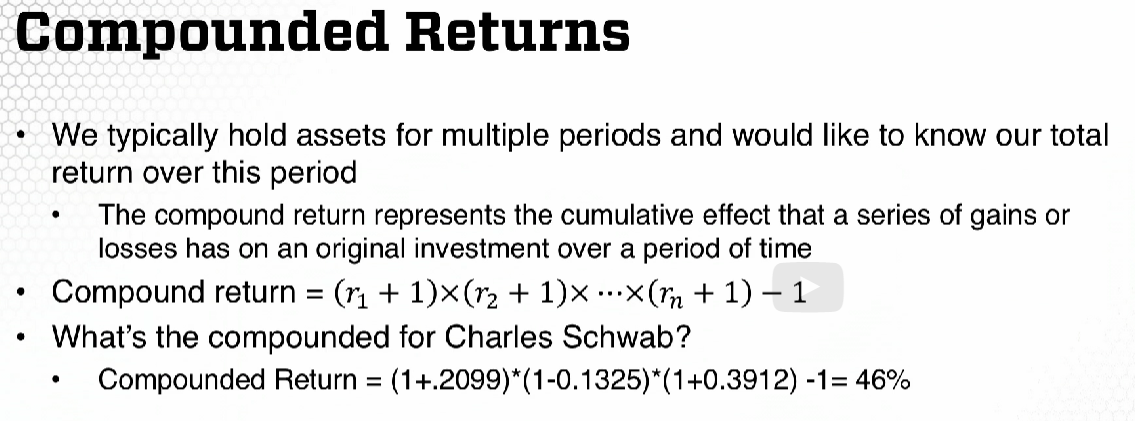

In [ ]:
ticker_aapl$Simple_Return = ticker_aapl$Simple_Return/100

ticker_googl$Simple_Return = ticker_googl$Simple_Return/100

In [ ]:
# Googl
googl_compound = 1
for(i in 2:length(ticker_googl$Simple_Return)) {
    googl_compound = (ticker_googl$Simple_Return[i]+1)*googl_compound
}
googl_compound = googl_compound - 1
googl_compound

[1] 25.34931

In [ ]:
# AAPL
aapl_compound = 1
for(i in 2:length(ticker_aapl$Simple_Return)) {
    aapl_compound = (ticker_aapl$Simple_Return[i]+1)*aapl_compound
}
aapl_compound = aapl_compound - 1
aapl_compound

[1] 6.3697

In [ ]:
round(googl_compound,2)*100
round(aapl_compound, 2)*100

[1] 2535

[1] 637

## 2.3.6 F

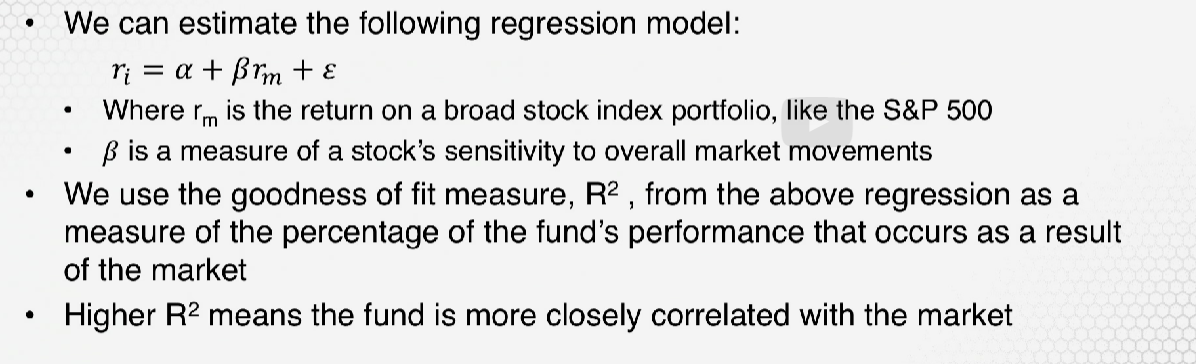

In [ ]:
head(ticker_aapl)

,Date,Close,Dividends,Stock.Splits,Simple_Return
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,71.92057,0.0000,1,0.00000000
2,2020-01-31,75.80502,0.0000,1,0.05401021
3,2020-02-28,67.11005,0.1925,1,-0.11216226
4,2020-03-31,62.42836,0.0000,1,-0.06976144
5,2020-04-30,72.12809,0.0000,1,0.15537377
6,2020-05-29,78.26578,0.2050,1,0.08793644


In [ ]:
ticker_aapl <- ticker_aapl[-1,]
ticker_googl <- ticker_googl[-1,]

In [ ]:
dim(ticker_aapl)

[1] 36  5

In [ ]:
head(ticker_gspc)

,Date,return_market
,<chr>,<dbl>
1,2020-01-31,-0.0016
2,2020-02-28,-0.0841
3,2020-03-31,-0.1251
4,2020-04-30,0.1268
5,2020-05-29,0.0453
6,2020-06-30,0.0184


In [ ]:
dim(ticker_gspc)

[1] 36  2

In [ ]:
head(ticker_meta)

,Date,return_meta
,<chr>,<dbl>
1,2020-01-31,-0.016542005
2,2020-02-28,-0.049046617
3,2020-03-31,-0.153896869
4,2020-04-30,0.185188815
5,2020-05-29,0.090541517
6,2020-06-30,0.008719826


In [ ]:
dim(ticker_meta)

[1] 36  2

In [ ]:
model_aapl <- lm(ticker_aapl$Simple_Return ~ ticker_gspc$return_market)

model_meta <- lm(ticker_meta$return_meta ~ ticker_gspc$return_market)


In [ ]:
summary(model_aapl)


Call:
lm(formula = ticker_aapl$Simple_Return ~ ticker_gspc$return_market)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3314 -0.1667 -0.1016 -0.0094  3.5532 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)                 0.1028     0.1057   0.972   0.3378  
ticker_gspc$return_market   3.0282     1.7437   1.737   0.0915 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6303 on 34 degrees of freedom
Multiple R-squared:  0.08148,	Adjusted R-squared:  0.05446 
F-statistic: 3.016 on 1 and 34 DF,  p-value: 0.0915


In [ ]:
summary(model_meta)


Call:
lm(formula = ticker_meta$return_meta ~ ticker_gspc$return_market)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50974 -0.02468  0.02031  0.06992  0.18540 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -0.03099    0.02215  -1.399  0.17089   
ticker_gspc$return_market  1.05516    0.36543   2.887  0.00671 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1321 on 34 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1733 
F-statistic: 8.338 on 1 and 34 DF,  p-value: 0.006707


Betas

AAPL: 3.0282

Meta: 1.055

Apple has higher beta and hence higher market risk

## 2.3.7 G

In [ ]:
ticker_aapl$cum_ret <- cumsum(ticker_aapl$Simple_Return)
ticker_googl$cum_ret <- cumsum(ticker_googl$Simple_Return)
ticker_amzn$cum_ret <- cumsum(ticker_amzn$return_amzn)
ticker_meta$cum_ret <- cumsum(ticker_meta$return_meta)
ticker_nflx$cum_ret <- cumsum(ticker_nflx$return_nflx)
ticker_gspc$cum_ret <- cumsum(ticker_gspc$return_market)

In [ ]:
ticker_aapl$Date <- as.Date(ticker_aapl$Date)
ticker_googl$Date <- as.Date(ticker_googl$Date)
ticker_amzn$Date <- as.Date(ticker_amzn$Date)
ticker_meta$Date <- as.Date(ticker_meta$Date)
ticker_nflx$Date <- as.Date(ticker_nflx$Date)
ticker_gspc$Date <- as.Date(ticker_gspc$Date)

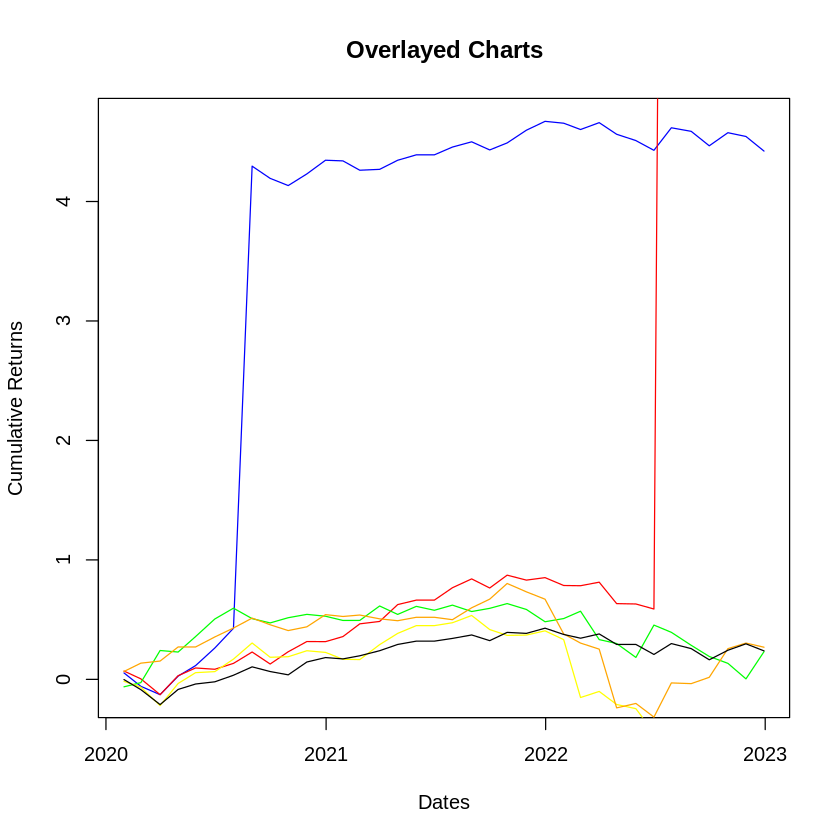

In [ ]:
plot(ticker_aapl$Date, ticker_aapl$cum_ret, type = "l",col = "blue", xlab = "Dates", ylab = "Cumulative Returns", main = "Overlayed Charts")
lines(ticker_googl$Date, ticker_googl$cum_ret, col="red")
lines(ticker_amzn$Date, ticker_amzn$cum_ret, col="green")
lines(ticker_meta$Date, ticker_meta$cum_ret, col="yellow")
lines(ticker_nflx$Date, ticker_nflx$cum_ret, col="orange")
lines(ticker_gspc$Date, ticker_gspc$cum_ret, col="black")

## 2.3.8 H

In [ ]:
head(ticker_amzn)

,Date,return_amzn,cum_ret
,<date>,<dbl>,<dbl>
1,2020-01-31,-0.06221372,-0.06221372
2,2020-02-28,0.03502057,-0.02719315
3,2020-03-31,0.26890012,0.24170697
4,2020-04-30,-0.01278494,0.22892203
5,2020-05-29,0.12956672,0.35848875
6,2020-06-30,0.14711363,0.50560238


In [ ]:
install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
returns_xts <- xts(ticker_amzn$return_amzn, order.by = ticker_amzn$Date)

In [ ]:
amzn_drawdowns <- table.Drawdowns(returns_xts)

In [ ]:
amzn_drawdowns

From,Trough,To,Depth,Length,To Trough,Recovery
<date>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
2021-11-30,2022-11-30,NA,-0.5210,15,13,NA
2020-08-31,2020-09-30,2021-03-31,-0.1202,8,2,6
2021-04-30,2021-04-30,2021-07-30,-0.0705,4,1,3
2020-01-31,2020-01-31,2020-03-31,-0.0622,3,1,2
2021-08-31,2021-08-31,2021-10-29,-0.0535,3,1,2


Most recent drawdown was from 30 November 2021 to 30 Nov 2022

---